In [38]:
!pip install numpy pandas matplotlib seaborn

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [40]:
data = pd.read_csv('health/mentalhealth_dataset.csv')

In [41]:
data_copy = pd.read_csv('health/mentalhealth_dataset.csv')

In [42]:
data.describe()

,Age,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.402000,3.122530,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000
std,2.373611,0.810961,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673
min,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.250000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000
50%,21.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000
75%,24.000000,4.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,7.0000,1.000000,5.000000,5.000000,19.000000,5.000000


In [43]:
data.isnull().sum()

,0
Timestamp,0
Gender,0
Age,0
Course,0
YearOfStudy,0
CGPA,0
Depression,0
Anxiety,0
PanicAttack,0
SpecialistTreatment,0


In [44]:
data = data.rename(columns={'SymptomFrequency_Last7Days':'Symptom Frequency','StudyHoursPerWeek':'Study Hours','StudyStressLevel':'Stress Level','HasMentalHealthSupport':'Support','PanicAttack':'Panic Attack','SpecialistTreatment':'Treatment','SleepQuality':'Sleep Quality','YearOfStudy':'Study Year','Stress_level':'Stress','Study_hours':'Study Hours'})

In [45]:
data.head()

,Timestamp,Gender,Age,Course,Study Year,CGPA,Depression,Anxiety,Panic Attack,Treatment,Symptom Frequency,Support,Sleep Quality,Stress Level,Study Hours,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


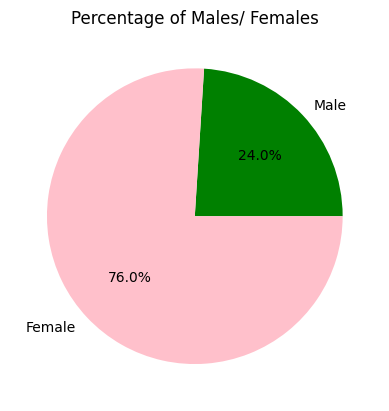

In [46]:
men = data.loc[data.Gender == 'Male']['Gender'].count()
female = data.loc[data.Gender == 'Female']['Gender'].count()

plt.pie([men,female],labels=['Male','Female'],colors=['green','pink'],autopct='%1.1f%%')
plt.title('Percentage of Males/ Females')
plt.show()

<ipython-input-47-6e88045469c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age',data=data,palette=['c','tomato'])
<ipython-input-47-6e88045469c9>:1: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Age',data=data,palette=['c','tomato'])


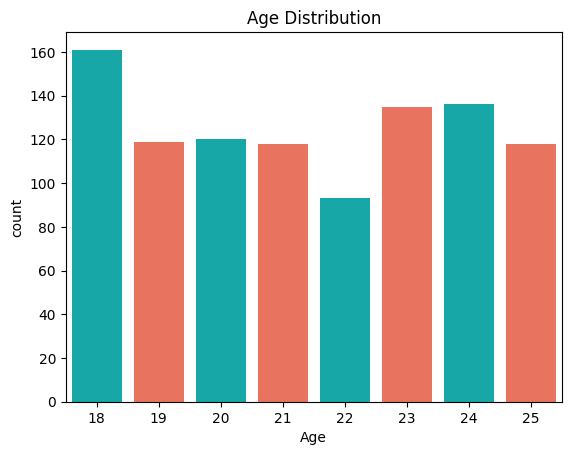

In [47]:
sns.countplot(x='Age',data=data,palette=['c','tomato'])
plt.title('Age Distribution')
plt.show()

In [48]:
data['Course'].value_counts().head(3)

,count
Course,
Engineering,180
BCS,177
BIT,101


<ipython-input-49-71938030c074>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  no_values = data.applymap(lambda x: 1 if str(x).strip().lower() == '0' else 0)


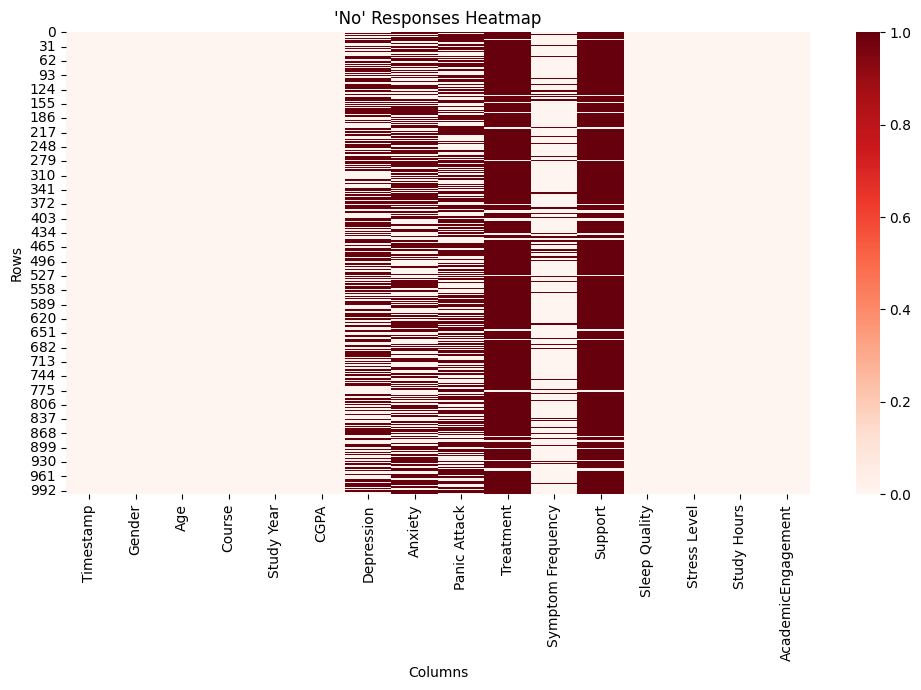

In [49]:
no_values = data.applymap(lambda x: 1 if str(x).strip().lower() == '0' else 0)

plt.figure(figsize=(12, 6))
sns.heatmap(no_values, cmap='Reds', cbar=True)
plt.title("'No' Responses Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


find out the number of males and females that study the top 3 most popular courses

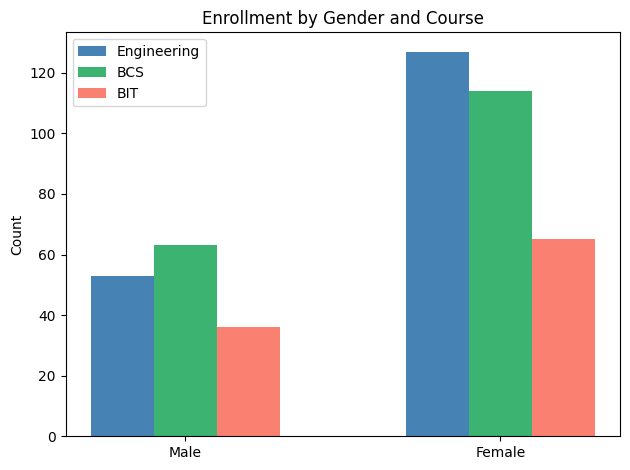

In [50]:
males_in_engineering = data.loc[(data.Gender == 'Male') & (data.Course == 'Engineering')]['Course'].count()
females_in_engineering = data.loc[(data.Gender == 'Female') & (data.Course == 'Engineering')]['Course'].count()

males_in_BCS = data.loc[(data.Gender == 'Male') & (data.Course == 'BCS')]['Course'].count()
females_in_BCS = data.loc[(data.Gender == 'Female') & (data.Course == 'BCS')]['Course'].count()

males_in_BIT = data.loc[(data.Gender == 'Male') & (data.Course == 'BIT')]['Course'].count()
females_in_BIT = data.loc[(data.Gender == 'Female') & (data.Course == 'BIT')]['Course'].count()

value_labels = ['Male', 'Female']
engineering_values = [males_in_engineering, females_in_engineering]
bcs_values = [males_in_BCS, females_in_BCS]
bit_values = [males_in_BIT, females_in_BIT]

x = range(len(value_labels))
width = 0.20

plt.bar([i - width for i in x], engineering_values, width=width, label='Engineering', color='steelblue')
plt.bar(x, bcs_values, width=width, label='BCS', color='mediumseagreen')
plt.bar([i + width for i in x], bit_values, width=width, label='BIT', color='salmon')

# Axis and labels
plt.xticks(x, value_labels)
plt.ylabel('Count')
plt.title('Enrollment by Gender and Course')
plt.legend()
plt.tight_layout()
plt.show()


[Text(0.5, 1.0, 'Students of different ages and genders in data')]

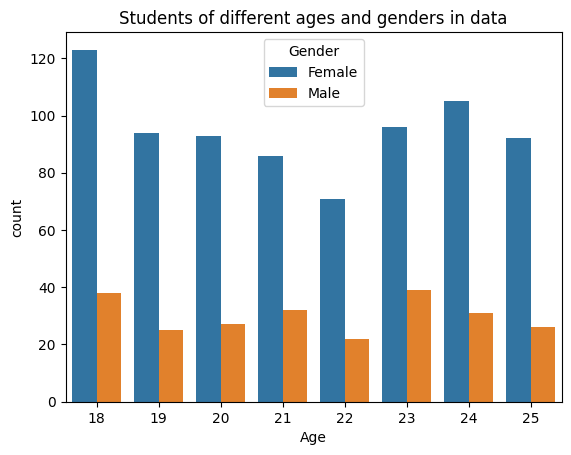

In [51]:
sns.countplot(data, x='Age', hue='Gender').set(title='Students of different ages and genders in data')

<ipython-input-52-b877e4531bb8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_courses.index, y=popular_courses.values, palette='viridis')


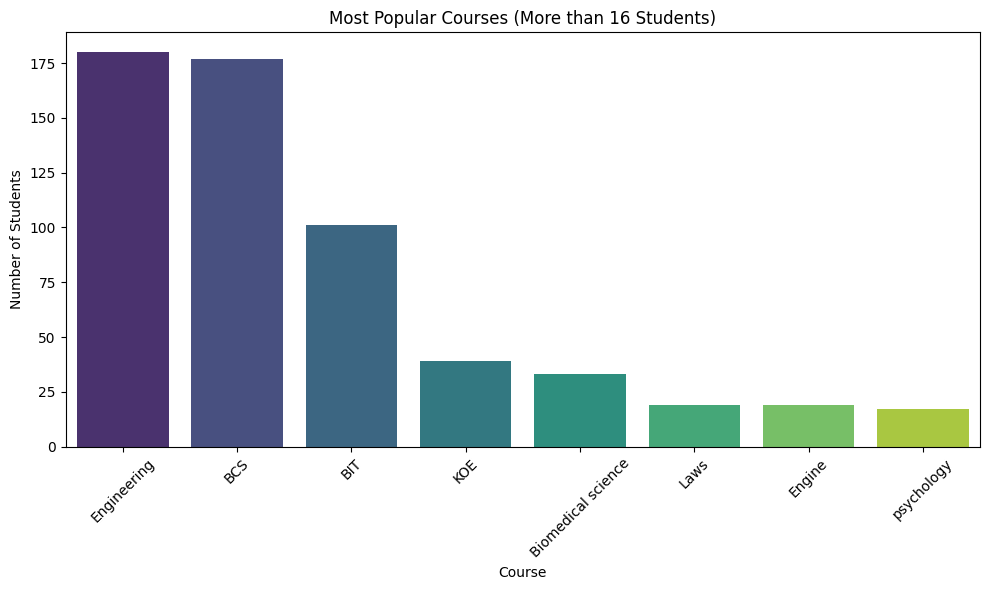

In [52]:
popular_courses = data['Course'].value_counts()
popular_courses = popular_courses[popular_courses > 16].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_courses.index, y=popular_courses.values, palette='viridis')
plt.title('Most Popular Courses (More than 16 Students)')
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'CGPA')

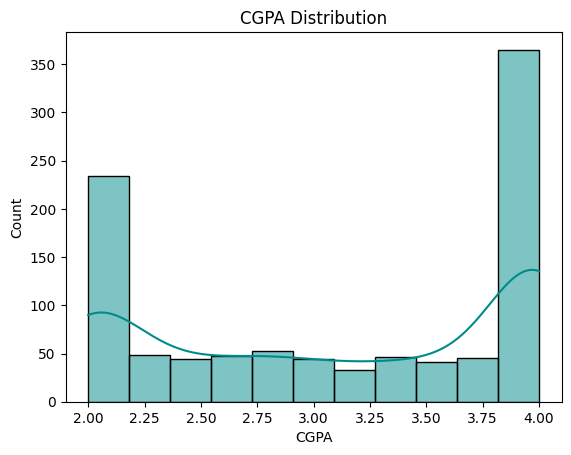

In [53]:
sns.histplot(data,x='CGPA',color='darkcyan',kde=True)
plt.title('CGPA Distribution')
plt.xlabel('CGPA')


<ipython-input-54-4928f62949af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Sleep Quality'],y=data['CGPA'], palette =['royalblue','lightpink'])
<ipython-input-54-4928f62949af>:2: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=data['Sleep Quality'],y=data['CGPA'], palette =['royalblue','lightpink'])


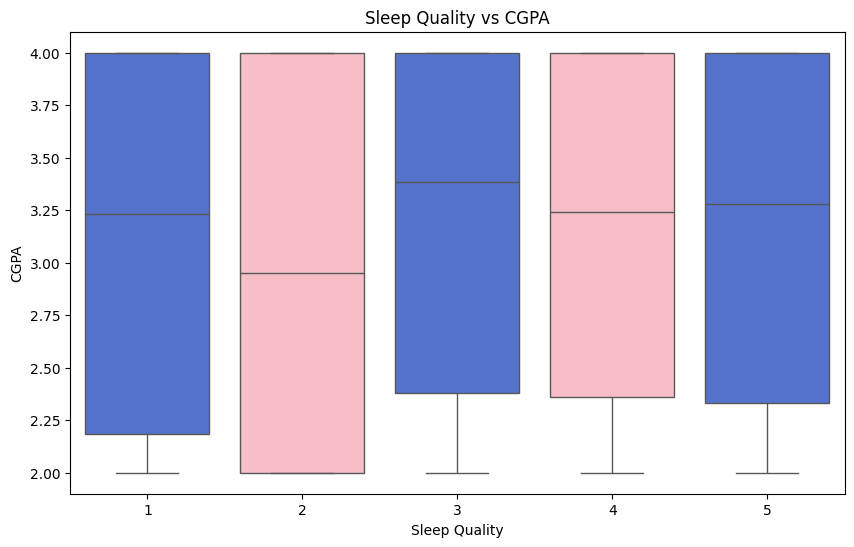

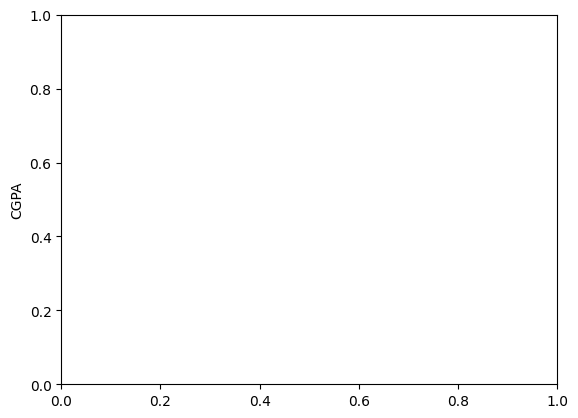

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sleep Quality'],y=data['CGPA'], palette =['royalblue','lightpink'])
data.head()
plt.title('Sleep Quality vs CGPA')
plt.xlabel('Sleep Quality')
plt.ylabel('CGPA')
plt.show()
plt.ylabel('CGPA')
plt.show()

<ipython-input-55-dcf511a480d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Stress Level'],y=data['CGPA'], palette =['peru','khaki'])
<ipython-input-55-dcf511a480d3>:2: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=data['Stress Level'],y=data['CGPA'], palette =['peru','khaki'])


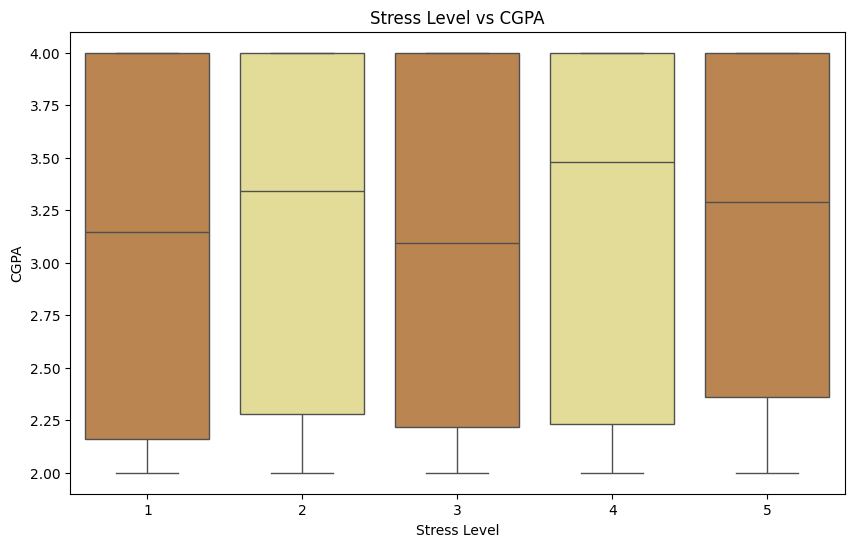

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Stress Level'],y=data['CGPA'], palette =['peru','khaki'])
plt.title('Stress Level vs CGPA')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

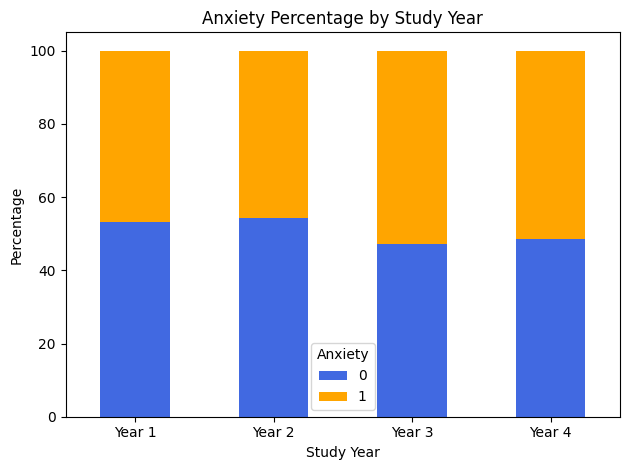

In [56]:
data['Study Year'] = data['Study Year'].str.strip().str.title()

# Group and calculate percentages
group = data.groupby(['Study Year', 'Depression']).size().unstack(fill_value=0)
percentages = group.div(group.sum(axis=1), axis=0) * 100

# Create a bar chart
percentages.plot(kind='bar', stacked=True,color = ['royalblue','orange'])
plt.title('Anxiety Percentage by Study Year')
plt.ylabel('Percentage')
plt.xlabel('Study Year')
plt.legend(title='Anxiety')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

study hours per age

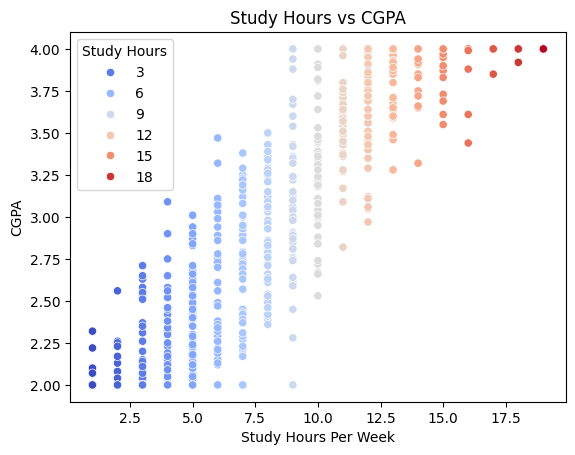

In [57]:
sns.scatterplot(data=data, x='Study Hours', y='CGPA', hue='Study Hours', palette='coolwarm')
plt.title('Study Hours vs CGPA')
plt.xlabel('Study Hours Per Week')
plt.ylabel('CGPA')
plt.legend(title='Study Hours')
plt.show()

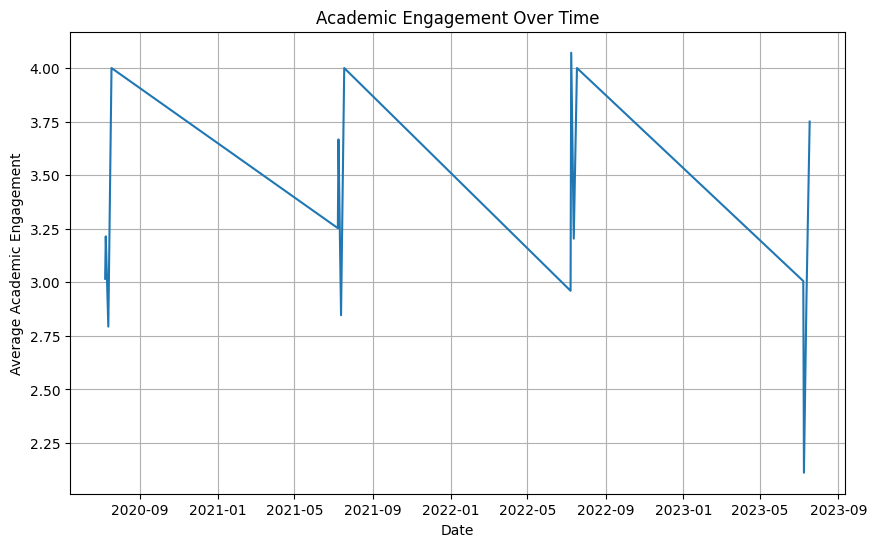

In [58]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='mixed')

# Time trend for Academic Engagement
data.groupby(data['Timestamp'].dt.date)['AcademicEngagement'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Academic Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Average Academic Engagement')
plt.grid(True)
plt.show()

In [59]:
data['Age'].value_counts().sort_values(ascending=False)

,count
Age,
18,161
24,136
23,135
20,120
19,119
25,118
21,118
22,93


age 18 and depression = yes

In [60]:
depression_18 = data.loc[(data.Age == 18) & (data.Depression == 1), 'Depression'].count()

no_depression_18 = data.loc[(data.Age == 18) & (data.Depression == 0), 'Depression'].count()

depression_24 = data.loc[(data.Age == 24) & (data.Depression == 1), 'Depression'].count()

no_depression_24 = data.loc[(data.Age == 24) & (data.Depression == 0), 'Depression'].count()

depression_23 = data.loc[(data.Age == 23) & (data.Depression == 1), 'Depression'].count()

no_depression_23 = data.loc[(data.Age == 23) & (data.Depression == 0), 'Depression'].count()

depression_20 = data.loc[(data.Age == 20) & (data.Depression == 1), 'Depression'].count()

no_depression_20 = data.loc[(data.Age == 20) & (data.Depression == 0), 'Depression'].count()

depression_19 = data.loc[(data.Age == 19) & (data.Depression == 1), 'Depression'].count()

no_depression_19 = data.loc[(data.Age == 19) & (data.Depression == 0), 'Depression'].count()

depression_25 = data.loc[(data.Age == 25) & (data.Depression == 1), 'Depression'].count()

no_depression_25 = data.loc[(data.Age == 25) & (data.Depression == 0), 'Depression'].count()

depression_21 = data.loc[(data.Age == 21) & (data.Depression == 1), 'Depression'].count()

no_depression_21 = data.loc[(data.Age == 21) & (data.Depression == 0), 'Depression'].count()

depression_22 = data.loc[(data.Age == 22) & (data.Depression == 1), 'Depression'].count()

no_depression_22 = data.loc[(data.Age == 22) & (data.Depression == 0), 'Depression'].count()




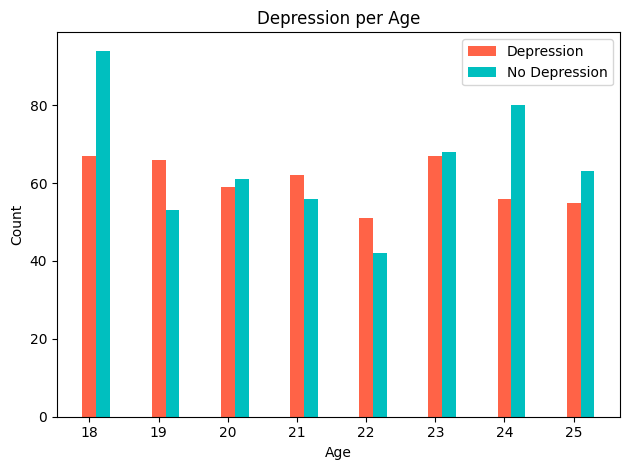

In [61]:
visuals = [18,19,20,21,22,23,24,25]

depress = [depression_18,depression_19,depression_20,depression_21,depression_22,depression_23,depression_24,depression_25]
non_depress = [no_depression_18,no_depression_19,no_depression_20,no_depression_21,no_depression_22,no_depression_23,no_depression_24,no_depression_25]

x = range(len(visuals))
width = 0.20

plt.bar(x, depress, width=width, label='Depression', color='tomato')
plt.bar([i + width for i in x], non_depress, width=width, label='No Depression', color='c')

# Axis and labels
plt.xticks(x, visuals)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Depression per Age')
plt.legend()
plt.tight_layout()
plt.show()

now lets do year group by the amount of support they recieve

In [62]:
data['Study Year'].value_counts()

,count
Study Year,
Year 1,412
Year 2,274
Year 3,240
Year 4,74


In [63]:
support_year1 = data.loc[(data['Study Year'] == 'Year 1') & (data['Support'] == 1), 'Support'].count()


no_support_year1 = data.loc[(data['Study Year'] == 'Year 1') & (data['Support'] == 0), 'Support'].count()

support_year2 = data.loc[(data['Study Year'] == 'Year 2') & (data['Support'] == 1), 'Support'].count()


no_support_year2 = data.loc[(data['Study Year'] == 'Year 2') & (data['Support'] == 0), 'Support'].count()

support_year3 = data.loc[(data['Study Year'] == 'Year 3') & (data['Support'] == 1), 'Support'].count()

no_support_year3 = data.loc[(data['Study Year'] == 'Year 3') & (data['Support'] == 0), 'Support'].count()

support_year4 = data.loc[(data['Study Year'] == 'Year 4') & (data['Support'] == 1), 'Support'].count()

no_support_year4 = data.loc[(data['Study Year'] == 'Year 4') & (data['Support'] == 0), 'Support'].count()



values = ['Year 1', 'Year 2', 'Year 3', 'Year 4']
support = [support_year1, support_year2, support_year3, support_year4]
no_support = [no_support_year1, no_support_year2, no_support_year3, no_support_year4]


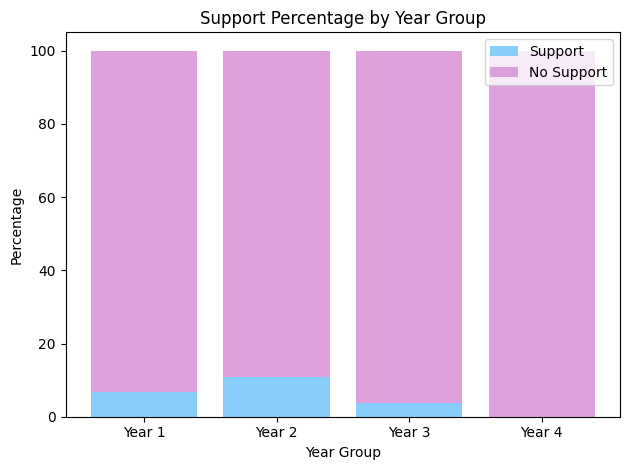

In [64]:
support_prc = [d / (d + n) * 100 for d, n in zip(support, no_support)]
non_support_prc = [100 - p for p in support_prc]

x = np.arange(len(values))

plt.bar(x, support_prc, label='Support', color='lightskyblue')
plt.bar(x, non_support_prc, bottom=support_prc, label='No Support', color='plum')

plt.xticks(x, values)
plt.ylabel('Percentage')
plt.xlabel('Year Group')
plt.title('Support Percentage by Year Group')
plt.legend()
plt.tight_layout()
plt.show()

sleep quality per vs specialist treatment

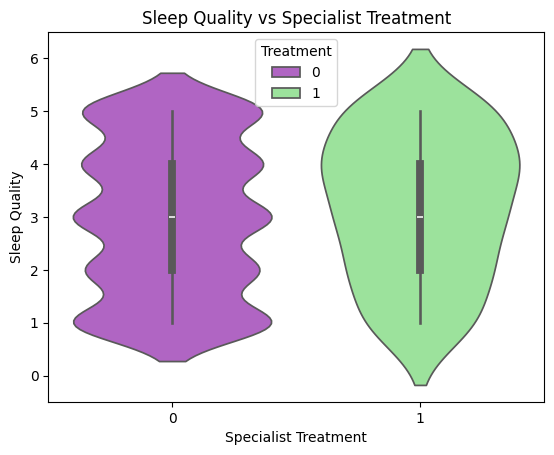

In [65]:
sns.violinplot(data,x='Treatment',y='Sleep Quality',hue='Treatment',palette = ['mediumorchid','lightgreen'])
plt.title('Sleep Quality vs Specialist Treatment')
plt.xlabel('Specialist Treatment')
plt.ylabel('Sleep Quality')
plt.show()

In [66]:
data.head()

,Timestamp,Gender,Age,Course,Study Year,CGPA,Depression,Anxiety,Panic Attack,Treatment,Symptom Frequency,Support,Sleep Quality,Stress Level,Study Hours,AcademicEngagement
0,2020-07-13,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,2020-07-13,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,2020-07-13,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,2020-07-13,Female,18,Engineering,Year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,2020-07-13,Female,20,Engineering,Year 4,2.00,1,1,0,0,0,0,2,4,3,2


stress level per age

<ipython-input-68-3041770c149f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data,x='Age',y='Stress Level',palette = ['darkolivegreen','crimson'])
<ipython-input-68-3041770c149f>:1: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data,x='Age',y='Stress Level',palette = ['darkolivegreen','crimson'])


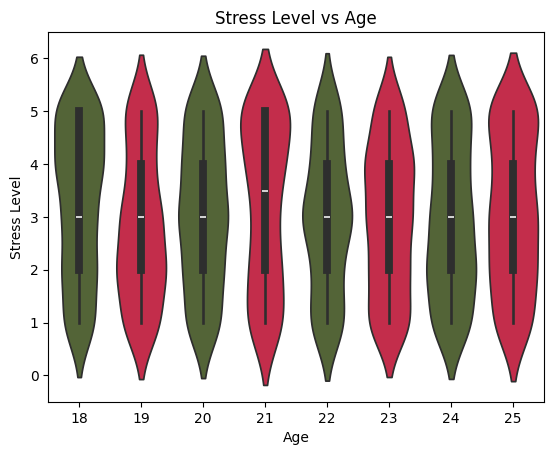

In [68]:
sns.violinplot(data,x='Age',y='Stress Level',palette = ['darkolivegreen','crimson'])
plt.title('Stress Level vs Age')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

find out the most popular case between depression, anxiety, panic attack

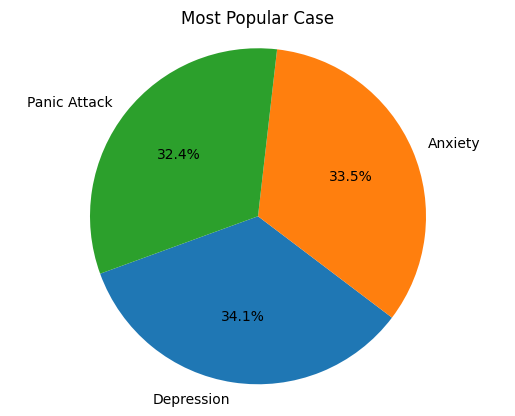

In [69]:
depression_amount = data.loc[data['Depression'] == 1]['Depression'].count()
anxiety_amount = data.loc[data['Anxiety'] == 1]['Anxiety'].count()
panic_attack_amount = data.loc[data['Panic Attack'] == 1]['Panic Attack'].count()


all_in_one = [depression_amount,anxiety_amount,panic_attack_amount]
labels = ['Depression', 'Anxiety', 'Panic Attack']


plt.pie(all_in_one, labels=labels, autopct='%1.1f%%', startangle=200)
plt.axis('equal')
plt.title('Most Popular Case')
plt.show()

top 3 courses that had the biggest study amount

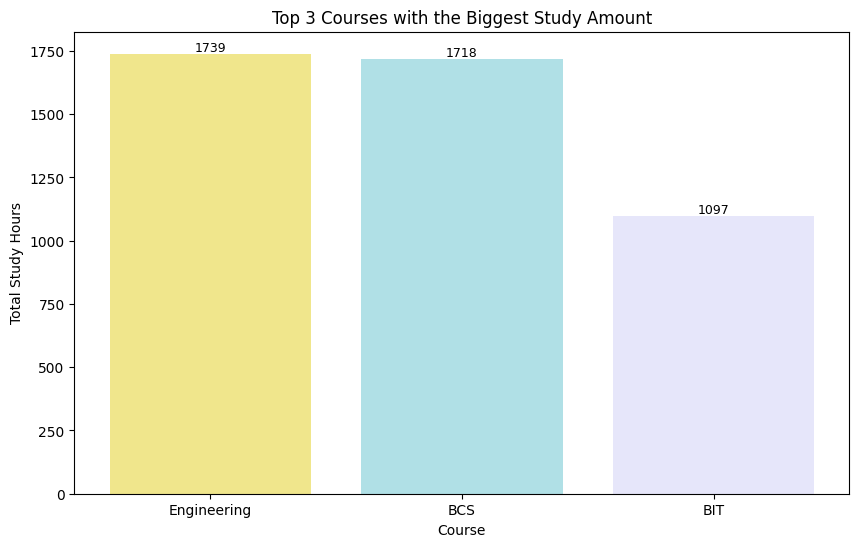

In [70]:
top_3_courses = data.groupby('Course')['Study Hours'].sum().nlargest(3)

plt.figure(figsize=(10, 6))

bars1 = plt.bar(top_3_courses.index, top_3_courses.values, color = ['khaki','powderblue','lavender'])


for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(height), ha='center', fontsize=9)


plt.xlabel('Course')
plt.ylabel('Total Study Hours')
plt.title('Top 3 Courses with the Biggest Study Amount')
plt.show()

Do people with academic engagement have a higher CGP

<ipython-input-71-7531effa9783>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data,x='AcademicEngagement',y='CGPA',palette = ['palegreen','darkturquoise'])
<ipython-input-71-7531effa9783>:1: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=data,x='AcademicEngagement',y='CGPA',palette = ['palegreen','darkturquoise'])


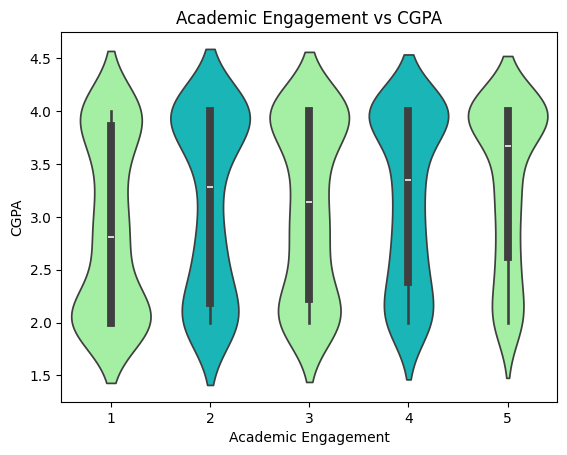

In [71]:
sns.violinplot(data=data,x='AcademicEngagement',y='CGPA',palette = ['palegreen','darkturquoise'])
plt.title('Academic Engagement vs CGPA')
plt.xlabel('Academic Engagement')
plt.ylabel('CGPA')
plt.show()

Do the study hours depend on the year?

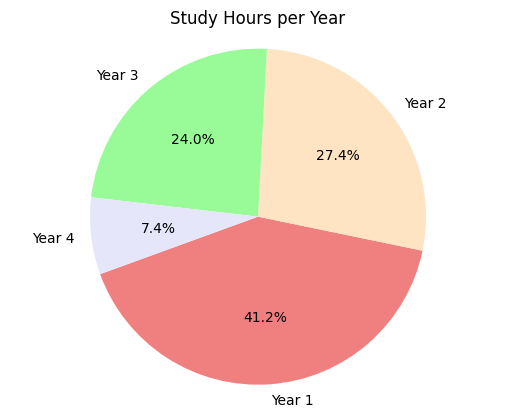

In [72]:
year1 = data.loc[data['Study Year'] == 'Year 1']['Study Hours'].count()

year2 = data.loc[data['Study Year'] == 'Year 2']['Study Hours'].count()

year3 = data.loc[data['Study Year'] == 'Year 3']['Study Hours'].count()

year4 = data.loc[data['Study Year'] == 'Year 4']['Study Hours'].count()



all_years = [year1,year2,year3,year4]
labels = ['Year 1', 'Year 2', 'Year 3', 'Year 4']


plt.pie(all_years, labels=labels, autopct='%1.1f%%', startangle=200,colors=['lightcoral','bisque','palegreen','lavender'])
plt.axis('equal')
plt.title('Study Hours per Year')
plt.show()